In [1]:
# Importing Libraries and their associated methods

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits = load_digits()


In [2]:
# Determining the total number of images and labels

print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


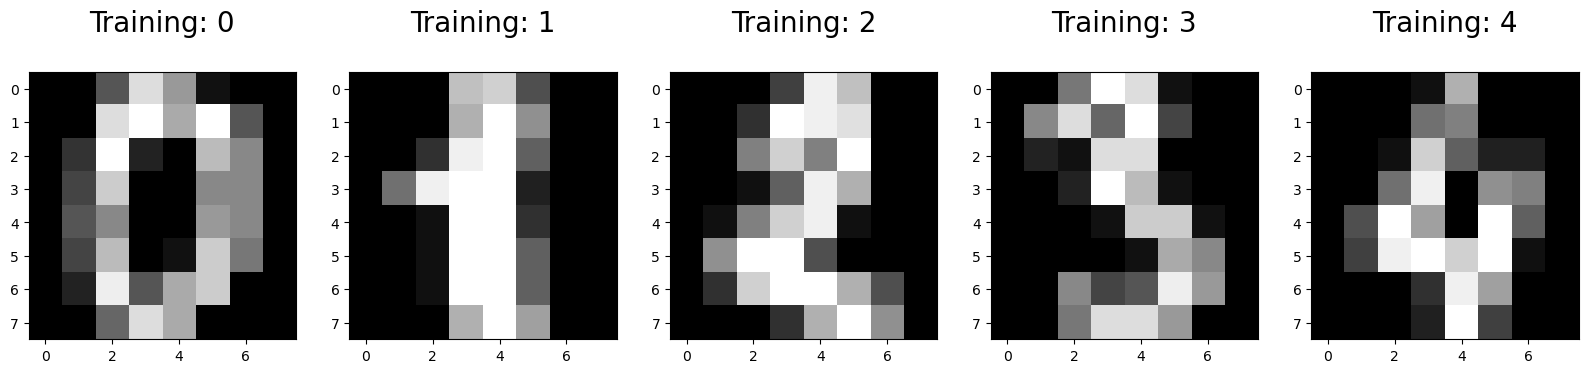

In [6]:
# Displaying some of the images and labels

plt.figure(figsize=(20,4))
for index,  (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [7]:
# Dividing dataset into Training and Test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)



In [8]:
print(x_train.shape)

(1383, 64)


In [9]:
print(y_train.shape)

(1383,)


In [10]:
print(x_test.shape)

(414, 64)


In [11]:
print(y_test.shape)

(414,)


Logistic Regression Model

In [18]:
# Import the Logistic Regression Model

from sklearn.linear_model import LogisticRegression

# making an instance of the model and training it

logisticRegr = LogisticRegression(solver='liblinear')

logisticRegr.fit(x_train, y_train)

# predicting the output of the first element of test set

print(logisticRegr.predict(x_test[0].reshape(1,-1)))

# predicting for entire dataset

predictions = logisticRegr.predict(x_test)

# determining the accuracy of the model

score = logisticRegr.score(x_test,y_test)
score

[4]


0.9420289855072463

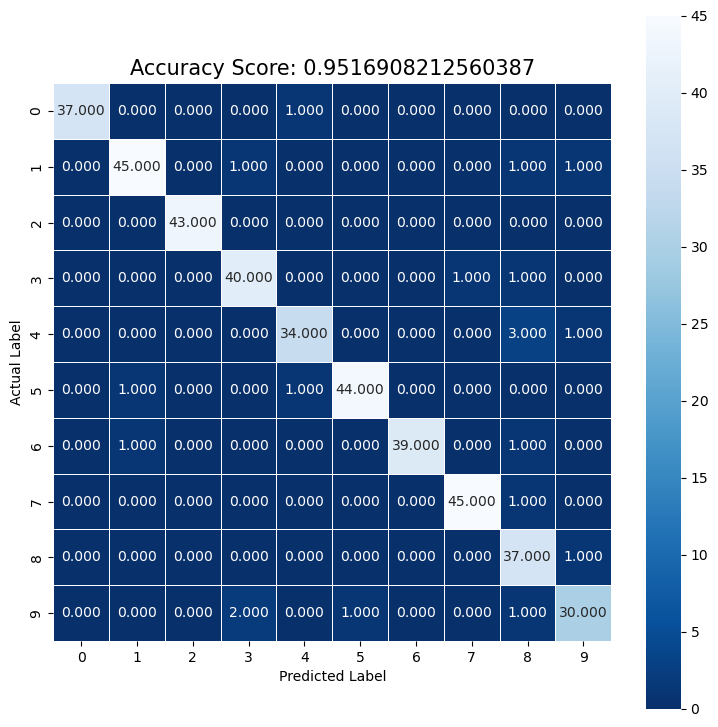

In [17]:
# Representing the Confusion Matrix in a heat map

cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap = 'Blues_r');
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size=15);

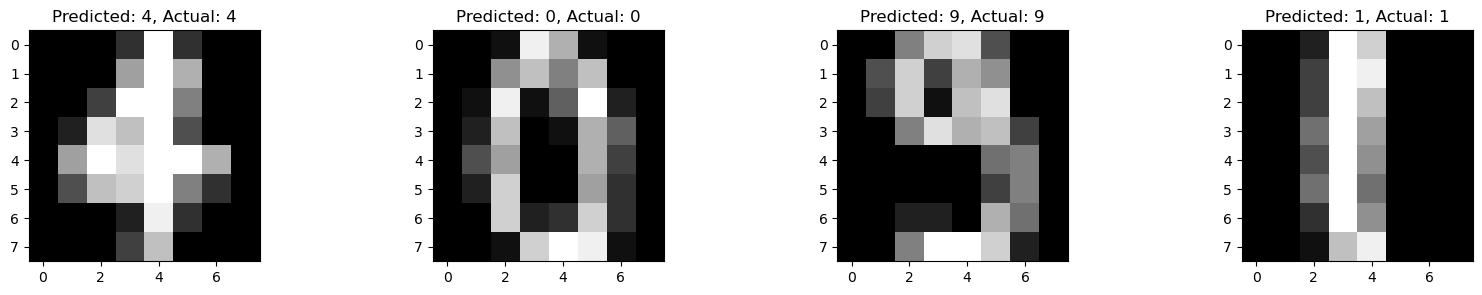

In [21]:
index = 0
classifiedIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classifiedIndex.append(index)
    index += 1
    
plt.figure(figsize=(20, 3))
for plotIndex, wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap = plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong], fontsize = 20))
        